**Jp Whisky Topic Modeling**

TEXT NORMALIZATION

Below, we'll define a number of functions that perform various text "cleaning" jobs. After each function is defined, you can test that function by running it on a test sentence (object called test_text). At the end of the notebook, we combine all those function into one function called normolize_corpus.

We'll use the sentence below for testing the functions. It has punctuations signs, numbers, HTML markups, and other things to take care of:

In [92]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from wordcloud import WordCloud

In [93]:
df = pd.read_csv("./japanese_whisky_review.csv")
df.head()

,Unnamed: 0,Bottle_name,Brand,Title,Review_Content
0,1,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Overpriced dissapointment,Dull taste. High price. No finish. Over-hyped ...
1,2,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Delicious,Delicious! sugared red fruits and sweet with a...
2,3,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Good for beginners. i know cos i am a beginner,I am not a whisky expert but i really love the...
3,4,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Yamazaki Tutorial,"This is a terrible Yamazaki. Very young, unsh..."
4,5,The Yamazaki Single Malt Whisky - Distiller’s ...,Yamazaki,Very Nice,First time and I like it - fresh but not thin ...


In [94]:
df.columns

Index(['Unnamed: 0', 'Bottle_name', 'Brand', 'Title', 'Review_Content'], dtype='object')

In [95]:
df = df.rename(columns={
    "Unnamed: 0":"no.",
    "Bottle_name":"name",
    'Brand':"brand",
    'Title':"title",
    'Review_Content':"review"
})

print("brand")
print(df.brand.unique())
print("")
print("name")
print(df.name.unique())
print("")

brand
['Yamazaki' 'Hibiki' 'Hakushu' 'Nikka']

name
['The Yamazaki Single Malt Whisky - Distiller’s Reserve'
 'Yamazaki 12 Year Old' 'Yamazaki 18 Year Old' 'Yamazaki 10 Year Old'
 'Yamazaki Sherry Cask 2016' 'Yamazaki Bourbon Barrel 2013 (48.2%)'
 'Yamazaki Bourbon Barrel 2013 (48%)' 'Yamazaki Puncheon 2013'
 'Yamazaki Mizunara 2012' 'Yamazaki 25 Year Old' 'Yamazaki Mizunara 2013'
 'Yamazaki Sherry Cask 2013' 'Yamazaki 50 Year Old' 'Yamazaki 1984'
 'The Yamazaki Mizunara 18 Year Old (2017 Edition)'
 'Hibiki Japanese Harmony' 'Hibiki 35 Year Old by Tokuda Yasokichi III'
 "Hibiki Japanese Harmony Master's Select" 'Hibiki 17 Year Old'
 'Hibiki 30 Year Old' 'Hibiki 21 Year Old' 'Hibiki 12 Year Old'
 'Hibiki 12 Year Old 50cl'
 'The Hakushu Single Malt Whisky - Distiller’s Reserve'
 'Hakushu 12 Year Old' 'Hakushu 18 Year Old' 'Hakushu 25 Year Old '
 'Hakushu Bourbon Barrel' 'Hakushu 12 Year Old 43.5%'
 'Hakushu 10 Year Old' 'Nikka Whisky From The Barrel'
 'Nikka Coffey Grain Whisky' 'Nikka W

Get modules ready and available:

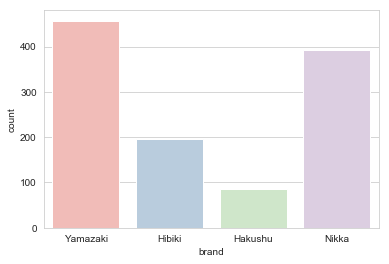

In [96]:
sns.countplot(x=df.brand,data=df, palette="Pastel1")

In [97]:
test_text = str(df.review)

In [98]:
import sys

!{sys.executable} -m pip install html.parser
import html.parser
from html.parser import HTMLParser

import re

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

import unicodedata
import string

!{sys.executable} -m pip install pattern3
import pattern3


import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from pprint import pprint

# Plotting tools
!{sys.executable} -m pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

  Could not find a version that satisfies the requirement html.parser (from versions: )
No matching distribution found for html.parser
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Define functions for lemmatization and HTML parsing:

In [99]:
wnl = WordNetLemmatizer()
html_parser = HTMLParser()

Defining the list of word contractions:

In [100]:
contraction_mapping = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

Select the list of stopwords from NLTK and amend it by adding more stopwords to it:

In [101]:
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list = stopword_list + ['mr', 'mrs', 'come', 'go', 'get',
                                 'tell', 'listen', 'one', 'two', 'three',
                                 'four', 'five', 'six', 'seven', 'eight',
                                 'nine', 'zero', 'join', 'find', 'make',
                                 'say', 'ask', 'tell', 'see', 'try', 'back',
                                 'also']

Split text into word tokens:

In [102]:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens

print("Original:  ", test_text)
print("Processed: ", tokenize_text(test_text))

Original:   0       Dull taste. High price. No finish. Over-hyped ...
1       Delicious! sugared red fruits and sweet with a...
2       I am not a whisky expert but i really love the...
3       This is a terrible Yamazaki.  Very young, unsh...
4       First time and I like it - fresh but not thin ...
5       I can’t believe all these commenters who are f...
6       My friend brought bottle of this from Japan in...
7       Nice. I like some vanilla and this has the goo...
8       Stands against Glenfiddich 12 in it's similari...
9                               Recommended by my friend.
10      As as good as the hype would have you believe....
11      If this is "far cry of Yamazaki 12" as some de...
12                             Recommended by my friend. 
13      rather disappointing. can't really taste what ...
14      Strong alcohol smell, by added water & lift ou...
15      Is the only version of Yamazaki that I have tr...
16      No "aged 12 years" on the box, so this is the ...
17

Expand contractions:

In [103]:
def expand_contractions(text, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
 
print("Original:  ", test_text)
print("Processed: ", expand_contractions(test_text,contraction_mapping))


Original:   0       Dull taste. High price. No finish. Over-hyped ...
1       Delicious! sugared red fruits and sweet with a...
2       I am not a whisky expert but i really love the...
3       This is a terrible Yamazaki.  Very young, unsh...
4       First time and I like it - fresh but not thin ...
5       I can’t believe all these commenters who are f...
6       My friend brought bottle of this from Japan in...
7       Nice. I like some vanilla and this has the goo...
8       Stands against Glenfiddich 12 in it's similari...
9                               Recommended by my friend.
10      As as good as the hype would have you believe....
11      If this is "far cry of Yamazaki 12" as some de...
12                             Recommended by my friend. 
13      rather disappointing. can't really taste what ...
14      Strong alcohol smell, by added water & lift ou...
15      Is the only version of Yamazaki that I have tr...
16      No "aged 12 years" on the box, so this is the ...
17

Annotate text tokens with Part-Of-Speach tags:

In [104]:
def pos_tag_text(text_tokens):
    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None  
    tagged_text = nltk.pos_tag(text_tokens)
    tagged_lower_text = [(word.lower(), penn_to_wn_tags(pos_tag))
                         for word, pos_tag in
                         tagged_text]
    return tagged_lower_text


print("Original:  ", test_text)
print("Processed: ", pos_tag_text(tokenize_text(test_text)))

Original:   0       Dull taste. High price. No finish. Over-hyped ...
1       Delicious! sugared red fruits and sweet with a...
2       I am not a whisky expert but i really love the...
3       This is a terrible Yamazaki.  Very young, unsh...
4       First time and I like it - fresh but not thin ...
5       I can’t believe all these commenters who are f...
6       My friend brought bottle of this from Japan in...
7       Nice. I like some vanilla and this has the goo...
8       Stands against Glenfiddich 12 in it's similari...
9                               Recommended by my friend.
10      As as good as the hype would have you believe....
11      If this is "far cry of Yamazaki 12" as some de...
12                             Recommended by my friend. 
13      rather disappointing. can't really taste what ...
14      Strong alcohol smell, by added water & lift ou...
15      Is the only version of Yamazaki that I have tr...
16      No "aged 12 years" on the box, so this is the ...
17

Lemmatize text based on Part-Of-Speach (POS) tags: 

In [105]:
def lemmatize_text(text):
    pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
                         else word                     
                         for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text
 
print("Original:  ", test_text)
print("Processed: ", lemmatize_text(tokenize_text(test_text)))

Original:   0       Dull taste. High price. No finish. Over-hyped ...
1       Delicious! sugared red fruits and sweet with a...
2       I am not a whisky expert but i really love the...
3       This is a terrible Yamazaki.  Very young, unsh...
4       First time and I like it - fresh but not thin ...
5       I can’t believe all these commenters who are f...
6       My friend brought bottle of this from Japan in...
7       Nice. I like some vanilla and this has the goo...
8       Stands against Glenfiddich 12 in it's similari...
9                               Recommended by my friend.
10      As as good as the hype would have you believe....
11      If this is "far cry of Yamazaki 12" as some de...
12                             Recommended by my friend. 
13      rather disappointing. can't really taste what ...
14      Strong alcohol smell, by added water & lift ou...
15      Is the only version of Yamazaki that I have tr...
16      No "aged 12 years" on the box, so this is the ...
17

Remove special characters, such as punctuation marks:

In [106]:
def remove_special_characters(text):
    tokens = tokenize_text(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub(' ', token) for token in tokens])
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text 

print("Original:  ", test_text)
print("Processed: ", remove_special_characters(test_text))

Original:   0       Dull taste. High price. No finish. Over-hyped ...
1       Delicious! sugared red fruits and sweet with a...
2       I am not a whisky expert but i really love the...
3       This is a terrible Yamazaki.  Very young, unsh...
4       First time and I like it - fresh but not thin ...
5       I can’t believe all these commenters who are f...
6       My friend brought bottle of this from Japan in...
7       Nice. I like some vanilla and this has the goo...
8       Stands against Glenfiddich 12 in it's similari...
9                               Recommended by my friend.
10      As as good as the hype would have you believe....
11      If this is "far cry of Yamazaki 12" as some de...
12                             Recommended by my friend. 
13      rather disappointing. can't really taste what ...
14      Strong alcohol smell, by added water & lift ou...
15      Is the only version of Yamazaki that I have tr...
16      No "aged 12 years" on the box, so this is the ...
17

Get rid of stopwords:

In [107]:
def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

print("Original:  ", test_text)
print("Processed: ", remove_stopwords(test_text))

Original:   0       Dull taste. High price. No finish. Over-hyped ...
1       Delicious! sugared red fruits and sweet with a...
2       I am not a whisky expert but i really love the...
3       This is a terrible Yamazaki.  Very young, unsh...
4       First time and I like it - fresh but not thin ...
5       I can’t believe all these commenters who are f...
6       My friend brought bottle of this from Japan in...
7       Nice. I like some vanilla and this has the goo...
8       Stands against Glenfiddich 12 in it's similari...
9                               Recommended by my friend.
10      As as good as the hype would have you believe....
11      If this is "far cry of Yamazaki 12" as some de...
12                             Recommended by my friend. 
13      rather disappointing. can't really taste what ...
14      Strong alcohol smell, by added water & lift ou...
15      Is the only version of Yamazaki that I have tr...
16      No "aged 12 years" on the box, so this is the ...
17

Remove all non-text characters (numbers, etc.):

In [108]:
def keep_text_characters(text):
    filtered_tokens = []
    tokens = tokenize_text(text)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

print("Original:  ", test_text)
print("Processed: ", keep_text_characters(test_text))

Original:   0       Dull taste. High price. No finish. Over-hyped ...
1       Delicious! sugared red fruits and sweet with a...
2       I am not a whisky expert but i really love the...
3       This is a terrible Yamazaki.  Very young, unsh...
4       First time and I like it - fresh but not thin ...
5       I can’t believe all these commenters who are f...
6       My friend brought bottle of this from Japan in...
7       Nice. I like some vanilla and this has the goo...
8       Stands against Glenfiddich 12 in it's similari...
9                               Recommended by my friend.
10      As as good as the hype would have you believe....
11      If this is "far cry of Yamazaki 12" as some de...
12                             Recommended by my friend. 
13      rather disappointing. can't really taste what ...
14      Strong alcohol smell, by added water & lift ou...
15      Is the only version of Yamazaki that I have tr...
16      No "aged 12 years" on the box, so this is the ...
17

Clean up HTML markups: 

In [109]:
class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ' '.join(self.fed)
    
def strip_html(text):
    html_stripper = MLStripper()
    html_stripper.feed(text)
    return html_stripper.get_data()

print("Original:  ", test_text)
print("Processed: ", strip_html(test_text))

Original:   0       Dull taste. High price. No finish. Over-hyped ...
1       Delicious! sugared red fruits and sweet with a...
2       I am not a whisky expert but i really love the...
3       This is a terrible Yamazaki.  Very young, unsh...
4       First time and I like it - fresh but not thin ...
5       I can’t believe all these commenters who are f...
6       My friend brought bottle of this from Japan in...
7       Nice. I like some vanilla and this has the goo...
8       Stands against Glenfiddich 12 in it's similari...
9                               Recommended by my friend.
10      As as good as the hype would have you believe....
11      If this is "far cry of Yamazaki 12" as some de...
12                             Recommended by my friend. 
13      rather disappointing. can't really taste what ...
14      Strong alcohol smell, by added water & lift ou...
15      Is the only version of Yamazaki that I have tr...
16      No "aged 12 years" on the box, so this is the ...
17

Removing accents from characters:

In [110]:
def normalize_accented_characters(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf8')
    return text

print("Original:  ", test_text)
print("Processed: ", normalize_accented_characters(test_text))

Original:   0       Dull taste. High price. No finish. Over-hyped ...
1       Delicious! sugared red fruits and sweet with a...
2       I am not a whisky expert but i really love the...
3       This is a terrible Yamazaki.  Very young, unsh...
4       First time and I like it - fresh but not thin ...
5       I can’t believe all these commenters who are f...
6       My friend brought bottle of this from Japan in...
7       Nice. I like some vanilla and this has the goo...
8       Stands against Glenfiddich 12 in it's similari...
9                               Recommended by my friend.
10      As as good as the hype would have you believe....
11      If this is "far cry of Yamazaki 12" as some de...
12                             Recommended by my friend. 
13      rather disappointing. can't really taste what ...
14      Strong alcohol smell, by added water & lift ou...
15      Is the only version of Yamazaki that I have tr...
16      No "aged 12 years" on the box, so this is the ...
17

Putting all functions together:

In [111]:
def normalize_corpus(corpus, only_text_chars=True):
    normalized_corpus = []  
    for index, text in enumerate(corpus):
        text = normalize_accented_characters(text)
        text = html.unescape(text)
        text = strip_html(text)
        text = expand_contractions(text, contraction_mapping)
        text = tokenize_text(text)
        text = lemmatize_text(text)
        text = remove_special_characters(text)
        text = remove_stopwords(text)
        if only_text_chars:
            text = keep_text_characters(text)
        #text = tokenize_text(text)
        normalized_corpus.append(text)    
    return normalized_corpus

Create a small corpus consisting of 2 test sentences and testing the normalize_corpus function on it:

In [112]:
test_corpus = [test_text]
test_corpus.append(test_text)

print("Original:  ", test_corpus,"\n")
print("Processed: ", normalize_corpus(test_corpus))

Original:   ['0       Dull taste. High price. No finish. Over-hyped ...\n1       Delicious! sugared red fruits and sweet with a...\n2       I am not a whisky expert but i really love the...\n3       This is a terrible Yamazaki.  Very young, unsh...\n4       First time and I like it - fresh but not thin ...\n5       I can’t believe all these commenters who are f...\n6       My friend brought bottle of this from Japan in...\n7       Nice. I like some vanilla and this has the goo...\n8       Stands against Glenfiddich 12 in it\'s similari...\n9                               Recommended by my friend.\n10      As as good as the hype would have you believe....\n11      If this is "far cry of Yamazaki 12" as some de...\n12                             Recommended by my friend. \n13      rather disappointing. can\'t really taste what ...\n14      Strong alcohol smell, by added water & lift ou...\n15      Is the only version of Yamazaki that I have tr...\n16      No "aged 12 years" on the box, s

** TOPIC MODELING: TOY CORPUS ** 
    
First, define a small function that would display the results of fitting a topic model:

In [113]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

We'll start by looking at the toy corpus on animals and programming we discussed last session:

In [114]:
wine_corpus = [test_text]

Normalize and create the "bag-of-words" representation of the corpus:

In [160]:
normalized_wine_corpus = normalize_corpus(wine_corpus)
bow_vectorizer = CountVectorizer()
bow_wine_corpus = bow_vectorizer.fit_transform(normalized_wine_corpus)
bow_feature_names_wine_corpus = bow_vectorizer.get_feature_names()

Have a look at the "bag-of-words" representation of your corpus (never hurts to know how you data look like!)

In [161]:
bow_table = pd.DataFrame(data = bow_wine_corpus.todense(), columns = bow_feature_names_wine_corpus)
bow_table.head

<bound method NDFrame.head of    absolutely  added  age  alcohol  although  always  amaze  amazing  arigato  \
0           1      1    1        1         1       1      1        2        1   

   beautiful  ...    whisky  wife  woodf  worl  would  xmas  yamazaki  year  \
0          1  ...         7     1      1     1      2     1         6     1   

   yoichi  young  
0       1      1  

[1 rows x 181 columns]>

Select number of topics, sparsity parameters (alpha >0 and beta >0, set them to < 1 to induce sparsity) to identify and fit the topic model (LDA):

In [164]:
no_topics = 7
doc_topic_prior_wine = 0.01  # alpha > 0
topic_word_prior_wine = 0.01 # beta > 0
lda_wine = LatentDirichletAllocation(n_components=no_topics, 
                                     doc_topic_prior = doc_topic_prior_wine,
                                     topic_word_prior = topic_word_prior_wine,
                                     max_iter=100).fit(bow_wine_corpus)

/Users/zhuliu/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Display results (we set that 10 most frequent words are displayed for each topic)

In [165]:
no_top_words = 9
display_topics(lda_wine, bow_feature_names_wine_corpus, no_top_words)

Topic 0:
whisky bottle yamazaki good whiskey amazing really friend taste
Topic 1:
like unders healthy taste ne would gift bring friend
Topic 2:
whiskey yamazaki whisky best always fruit particular favorite japanese
Topic 3:
could thin amazing unsh first iscepao flasu ben guy
Topic 4:
expert full perfect time bring commenters age like ou
Topic 5:
whisky yamazaki taste whiskey bottle love fruit really nice
Topic 6:
pupil son given cedar believe vat grey age xmas


Look at topics: word vectors:

In [167]:
word_weights = lda_wine_corpus.components_ / lda_wine_corpus.components_.sum(axis=1)[:, np.newaxis]
topic_1_words = pd.DataFrame(data = word_weights[0], index = bow_feature_names_wine_corpus)
topic_2_words = pd.DataFrame(data = word_weights[1], index = bow_feature_names_wine_corpus)
tw = pd.concat([topic_1_words,topic_2_words],axis = 1)
tw

,0,0
absolutely,0.005253,0.005381
added,0.005505,0.005781
age,0.005565,0.005734
alcohol,0.005430,0.005422
although,0.005524,0.005668
always,0.005509,0.005579
amaze,0.005652,0.005547
amazing,0.005580,0.005242
arigato,0.005480,0.005379
beautiful,0.005577,0.005475


In [171]:
from pandas import ExcelWriter
writer = ExcelWriter('JpWine.xlsx')
tw.to_excel(writer,'Sheet1',index=True)
writer.save()

In [169]:
no_features = 1000

normalized_corpus_wine = normalize_corpus(wine_corpus)

bow_vectorizer_wine = CountVectorizer(max_features=no_features)
bow_wine_corpus = bow_vectorizer_wine.fit_transform(normalized_corpus_wine)
bow_feature_names_wine = bow_vectorizer_wine.get_feature_names()

In [172]:
pyLDAvis.enable_notebook()
visualization_panel = pyLDAvis.sklearn.prepare(lda_wine, bow_wine_corpus, bow_vectorizer_wine, mds='tsne')
visualization_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
5      214.658813 -105.563255       1        1  99.975910
6       64.673004  -26.866432       2        1   0.004015
4      207.814026   63.681633       3        1   0.004015
3      -78.478218 -117.409790       4        1   0.004015
2       71.506859 -196.105331       5        1   0.004015
1      -85.315712   51.826679       6        1   0.004015
0       57.824791  142.375610       7        1   0.004015, topic_info=     Category      Freq       Term     Total  loglift  logprob
term                                                          
171   Default  6.000000     whisky  6.000000  30.0000  30.0000
177   Default  5.000000   yamazaki  5.000000  29.0000  29.0000
170   Default  4.000000    whiskey  4.000000  28.0000  28.0000
13    Default  4.000000     bottle  4.000000  27.0000  27.0000
144   Default  4.000000      taste  4.000000  26.0000  26.0000
54    Default  3.000000      fruit  3.000000  25.0000  25.0000
80    Default  3.000000       love  3.000000  24.0000  24.0000
114   Default  3.000000     really  3.000000  23.0000  23.0000
76    Default  2.000000       like  2.000000  22.0000  22.0000
53    Default  2.000000     friend  2.000000  21.0000  21.0000
60    Default  2.000000       good  2.000000  20.0000  20.0000
122   Default  2.000000         sa  2.000000  19.0000  19.0000
92    Default  2.000000       nice  2.000000  18.0000  18.0000
24    Default  1.000000      could  1.000000  17.0000  17.0000
140   Default  1.000000     subtle  1.000000  16.0000  16.0000
64    Default  1.000000        guy  1.000000  15.0000  15.0000
12    Default  1.000000       best  1.000000  14.0000  14.0000
123   Default  1.000000        sam  1.000000  13.0000  13.0000
7     Default  1.000000    amazing  1.000000  12.0000  12.0000
175   Default  1.000000      would  1.000000  11.0000  11.0000
82    Default  1.000000       malt  1.000000  10.0000  10.0000
73    Default  1.000000   japanese  1.000000   9.0000   9.0000
56    Default  1.000000       gift  1.000000   8.0000   8.0000
143   Default  1.000000  taketsuru  1.000000   7.0000   7.0000
166   Default  1.000000     violet  1.000000   6.0000   6.0000
165   Default  1.000000    version  1.000000   5.0000   5.0000
37    Default  1.000000      enjoy  1.000000   4.0000   4.0000
93    Default  1.000000       nose  1.000000   3.0000   3.0000
10    Default  1.000000    believe  1.000000   2.0000   2.0000
62    Default  1.000000      great  1.000000   1.0000   1.0000
...       ...       ...        ...       ...      ...      ...
176    Topic7  0.000055       xmas  1.002854   0.3206  -5.1940
15     Topic7  0.000055        box  1.002931   0.3203  -5.1943
155    Topic7  0.000055        toe  1.002954   0.3195  -5.1950
147    Topic7  0.000055        thi  1.002919   0.3194  -5.1952
132    Topic7  0.000055        smo  1.003095   0.3193  -5.1950
40     Topic7  0.000055       ever  1.003012   0.3189  -5.1956
108    Topic7  0.000055    process  1.002992   0.3186  -5.1958
119    Topic7  0.000055     remind  1.002915   0.3186  -5.1959
7      Topic7  0.000057    amazing  1.994818  -0.3448  -5.1717
171    Topic7  0.000058     whisky  6.955159  -1.5693  -5.1472
60     Topic7  0.000057       good  2.986902  -0.7425  -5.1657
13     Topic7  0.000058     bottle  4.970993  -1.2422  -5.1560
131    Topic7  0.000057      smell  1.994868  -0.3487  -5.1755
82     Topic7  0.000056       malt  1.995002  -0.3533  -5.1801
177    Topic7  0.000057   yamazaki  5.963228  -1.4265  -5.1583
170    Topic7  0.000057    whiskey  4.971157  -1.2531  -5.1669
53     Topic7  0.000057     friend  2.987048  -0.7512  -5.1744
114    Topic7  0.000057     really  3.979000  -1.0364  -5.1728
76     Topic7  0.000056       like  2.986947  -0.7526  -5.1758
144    Topic7  0.000057      taste  4.971319  -1.2608  -5.1745
143    Topic7  0.000056  taketsuru  1.995131  -0.3576  -5.1844
54     Topic7  0.000056      frui

In [ ]:
yamazaki = df[df.brand == "Yamazaki"]
hibiki = df[df.brand == "Hibiki"]
hakushu = df[df.brand == "Hakushu"]
nikka = df[df.brand == "Nikka"]
title = df.title

In [157]:
yamazaki_text = str(yamazaki.review)
hibiki_text = str(hibiki.review)
hakushu_text = str(hakushu.review)
nikka_text = str(nikka.review)
title_text = str(title)

In [158]:
yamazaki_wordcloud = WordCloud(
        background_color="white",
        width=900,
        height=500
    ).generate(yamazaki_text)

hibiki_wordcloud = WordCloud(
        background_color="white",
        width=900,
        height=500
    ).generate(hibiki_text)

hakushu_wordcloud = WordCloud(
        background_color="white",
        width=900,
        height=500
    ).generate(hakushu_text)

nikka_wordcloud = WordCloud(
        background_color="white",
        width=900,
        height=500
    ).generate(nikka_text)

title_wordcloud = WordCloud(
        background_color="white",
        width=900,
        height=500
    ).generate(title_text)

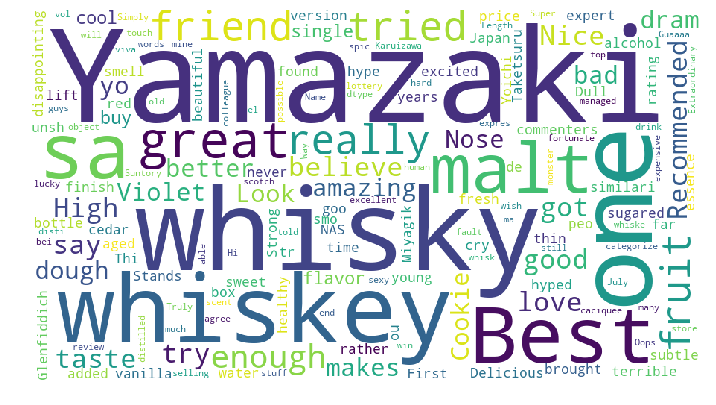

Yamazaki


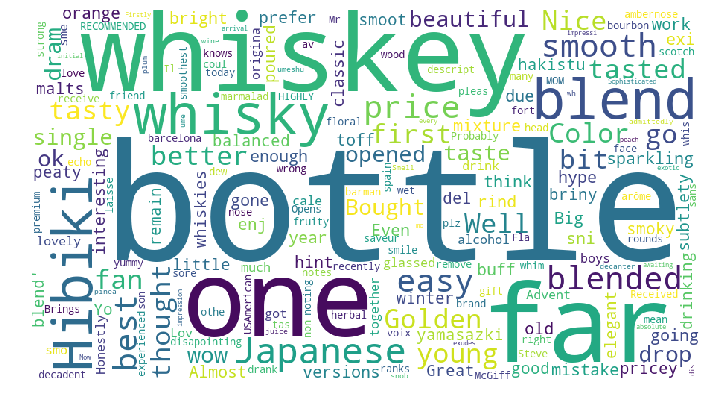

Hibiki


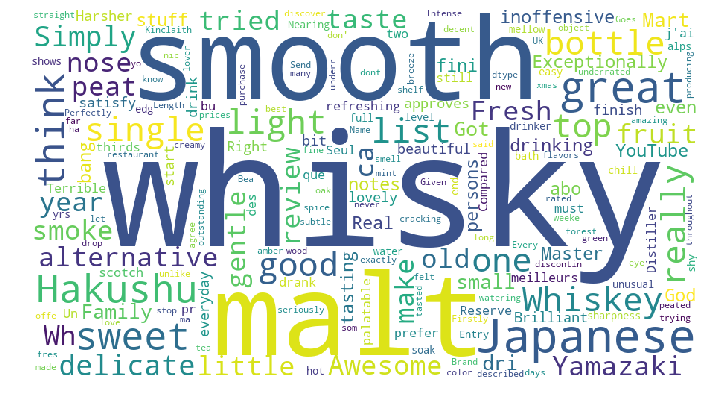

Hakushu


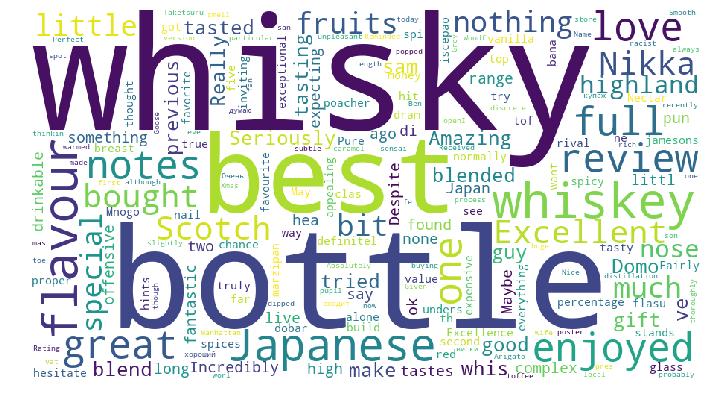

Nikka


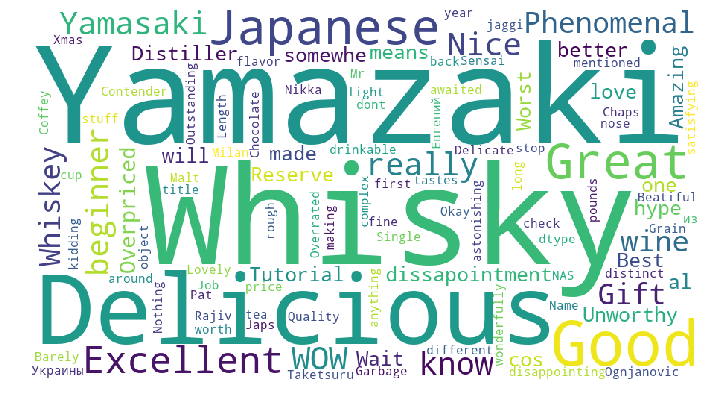

title


In [159]:
plt.figure(figsize=(12,10))
plt.imshow(yamazaki_wordcloud)

plt.axis("off")
plt.show()
print("Yamazaki")

plt.figure(figsize=(12,10))
plt.imshow(hibiki_wordcloud)

plt.axis("off")
plt.show()
print("Hibiki")

plt.figure(figsize=(12,10))
plt.imshow(hakushu_wordcloud)

plt.axis("off")
plt.show()
print("Hakushu")

plt.figure(figsize=(12,10))
plt.imshow(nikka_wordcloud)

plt.axis("off")
plt.show()
print("Nikka")

plt.figure(figsize=(12,10))
plt.imshow(title_wordcloud)

plt.axis("off")
plt.show()
print("title")